In [5]:
import pickle
import numpy as np
import matplotlib.pylab as plt
import math
%matplotlib inline

# Загружаем датасет

In [6]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

# Обучаем модель

In [ ]:
from sklearn.cross_validation import train_test_split
np.random.seed(10)

train_labels = [-1 if i == 5 else 1 for i in train['labels']]
x_train, x_test, y_train, y_test = train_test_split(train['data'], train_labels, test_size = 0.2, random_state = 10)

mean = np.mean(train['data'], axis=0)
std = np.std(train['data'], axis=0) + 0.001
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

x_train = np.hstack([ np.ones((x_train.shape[0], 1)), x_train])
x_test = np.hstack([ np.ones((x_test.shape[0], 1)), x_test])
w = np.random.normal(scale=0.001, size = x_train.shape[1])

def sigma(x, w):
    return 1. / (1. + np.exp(-np.dot(x.T, w)))

def accuracy(x, y, w):
    y_predictions = []
    for i in range(x.shape[0]):
        p = sigma(x[i], w)
        y_predictions.append(1 if p > 0.5 else -1)
    
    guessed_right = 0
    num_guesses = len(y_predictions)
    for i in range(num_guesses):
        if y_predictions[i] == y[i]:
            guessed_right += 1
    return guessed_right / num_guesses

def loss(x, y, w):
    sum_ = 0
    for i in range(x.shape[0]):
        sum_ += math.log(1 + math.exp(-y[i] * np.dot(w.T, x[i])))
    return sum_ / x.shape[0]


epochs = 100
rlambda = 0.0001
step = 0.0001
test_acc, train_acc, test_loss, train_loss = [], [], [], []

for i in range(epochs):
    for k in range(x_train.shape[0]):
        j = np.random.randint(0, x_train.shape[0])
        grad = - (y_train[j] * x_train[j])/(1 + math.exp(y_train[j] * np.dot(w.T, x_train[j]))) + rlambda * w
        w = w - step * grad
    test_acc.append(accuracy(x_test, y_test, w))
    train_acc.append(accuracy(x_train, y_train, w))
    test_loss.append(loss(x_test, y_test, w))
    train_loss.append(loss(x_train, y_train, w))

Final test accuracy:  0.9815
Final train accuracy:  0.98775


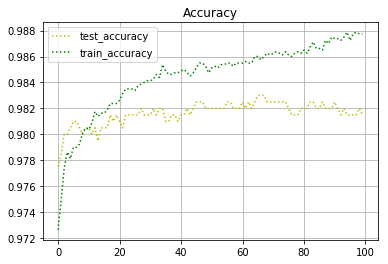

In [8]:
plt.grid(True)
plt.title('Accuracy')
plt.plot(test_acc, 'y:', label = 'test_accuracy')
plt.plot(train_acc, 'g:', label = 'train_accuracy')
plt.legend()
print('Final test accuracy: ', test_acc[-1])
print('Final train accuracy: ', train_acc[-1])

Final test loss:  0.05265976733240842
Final train loss:  0.038347383931007596


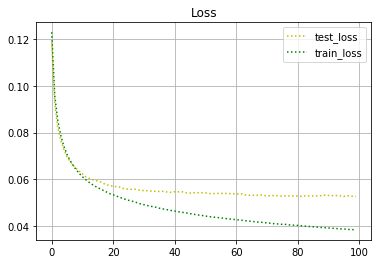

In [9]:
plt.grid(True)
plt.title('Loss')
plt.plot(test_loss, 'y:', label = 'test_loss')
plt.plot(train_loss, 'g:', label = 'train_loss')
plt.legend()
print('Final test loss: ', test_loss[-1])
print('Final train loss: ', train_loss[-1])

# Сохраняем данные для кагла

In [10]:
X = test_no_lables['data']

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0) + 0.001
X = (X - X_mean) / X_std
X = np.hstack([ np.ones((X.shape[0], 1)), X])

Y_pred = []
for i in range(X.shape[0]):
    p = sigma(X[i], w)
    Y_pred.append(p)

with open('solution7.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(Y_pred)):
        print(i, Y_pred[i], sep=',', file=fout)